## IT Academy - Data Science Challenge TalentSquad

https://nuwe.io/dev/challenges/jornada-talento-clasificacion-de-erupciones-volcanicas

### Description

Jorge is a geologist at SGMI (Spanish Geological and Mining Institute) who is developing a new eruption prevention system to be able to predict what type of eruption a volcano will have based on the vibrations detected by its sensors during the days prior to the eruption. This will reduce the risk of victims and material damage caused by this kind of natural disaster.

Jorge's system works with 5 types of eruptions:

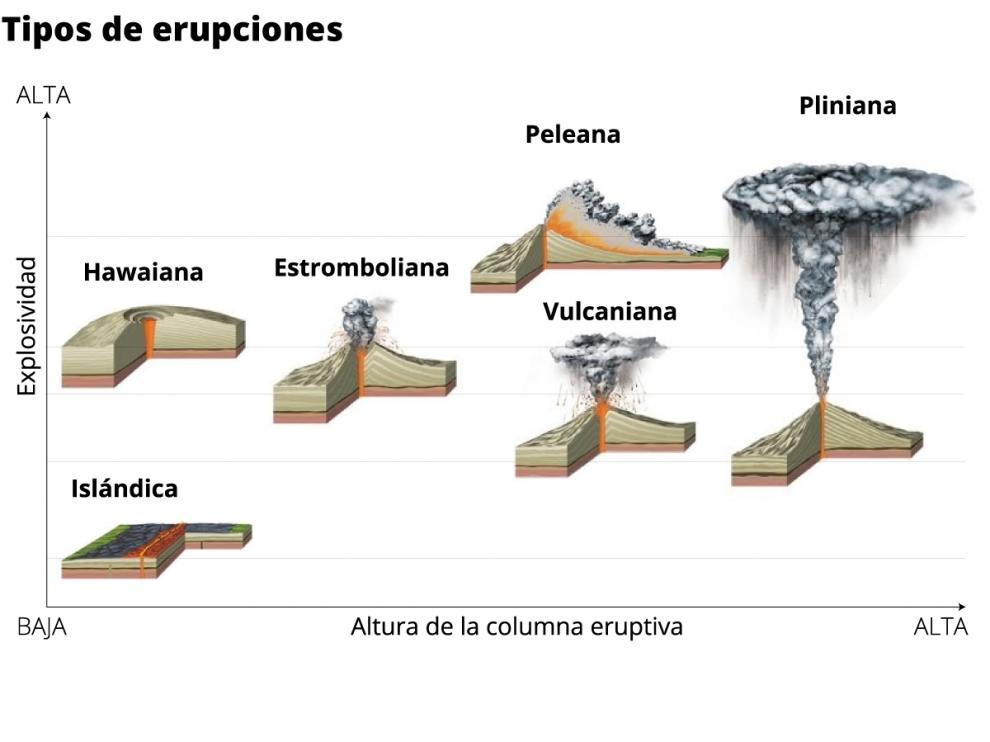

In [7]:
from IPython.display import Image
Image("C:/Users/Pereira/Documents/IT Academy/Hackaton IT Academy/Repte/tipos.jpeg", width=700, height=600)

- **Plinian**: It is characterized by its high degree of explosiveness, with very violent manifestations in which large volumes of volcanic gas, fragments and ashes are expelled.

- **Peleana**: The most important characteristic of a peleana eruption is the presence of a bright avalanche of hot volcanic ash, called a pyroclastic flow.

- **Vulcanian**: They are explosive-type volcanic eruptions. The magmatic material released is more viscous than in the case of Hawaiian or Strombolian eruptions; consequently, more pressure builds up from the magma chamber as magma rises toward the surface.

- **Hawaiian**: Consists of the emission of volcanic material, mostly basaltic, in an effusive or non-explosive manner. It happens this way because the diffusion of gases through more basic magmas (basaltic) can be slow but more or less continuous. Consequently, volcanic eruptions of this type are usually not very destructive.

- **Strombolian**: The Strombolian eruption is characterized by explosive eruptions separated by periods of calm of variable duration. The process of each explosion corresponds to the evolution of a gas bubble released by the magma itself.

The objective of this challenge will be to help Jorge by performing predictive modeling from a dataset that contains the measurements made by the sensors and their types.

In [171]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import xgboost as xgb
from imblearn.metrics import sensitivity_score, specificity_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, f1_score, average_precision_score
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from imblearn.metrics import sensitivity_score, specificity_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from scipy.stats import shapiro

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [11]:
# open the training file 
eruption_types = pd.read_csv('jm_train.csv')

eruption_types

,feature1,feature2,feature3,feature4,feature5,feature6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0
...,...,...,...,...,...,...,...
2095,-0.947002,0.174969,-0.180249,0.118236,-0.143420,-0.359509,0
2096,-1.224148,0.029956,0.536684,0.888406,0.119460,0.378946,1
2097,-0.847593,1.538574,0.962409,1.966467,0.379934,0.737907,3
2098,1.472437,1.187695,1.015766,-1.103522,1.586722,0.182569,4


## Description

**Features/Attributes**: The dataset contains 6 features in 6 columns, which are the parameters measured by the different sensors. These correspond to the vibrations detected at certain points on the slope of the volcano.

**Target variable**: The target corresponds to the 'label' that classifies the types of volcanic eruptions based on the features measured by the sensors.

- Target 0 corresponds to a *Plinian-type* eruption.


- Target 1 corresponds to a *Peleana-type* eruption.


- Target 2 corresponds to a *Vulcanian-type* eruption.


- Target 3 corresponds to a *Hawaiian-type* eruption.


- Target 4 corresponds to a *Strombolian-type* eruption.

## Exploratory Analysis of the dataset


In [12]:
eruption_types.isnull().sum()

feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
target      0
dtype: int64

In [14]:
eruption_types.dtypes

feature1    float64
feature2    float64
feature3    float64
feature4    float64
feature5    float64
feature6    float64
target        int64
dtype: object

All attributes are floats except Diagnosis, the target variable, which is an integer. There are no missing values in the data.

In [13]:
eruption_types.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.204656,0.199249,-0.378140,-0.206425,-0.186419,-0.433229,1.980476
std,1.543613,1.614024,1.450548,1.442225,1.501573,1.188791,1.410537
min,-6.683655,-5.383371,-6.147055,-5.653594,-5.912521,-4.433189,0.000000
25%,-1.171340,-0.877386,-1.365990,-1.259403,-1.211685,-1.131944,1.000000
50%,-0.443868,0.320507,-0.439745,-0.176504,-0.195751,-0.406754,2.000000
75%,0.890023,1.321430,0.662898,0.866879,0.851843,0.348593,3.000000
max,4.565547,6.700133,4.157518,4.371912,5.068783,4.016324,4.000000


In [15]:
eruption_types['target'].value_counts()

0    427
3    426
1    423
2    419
4    405
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

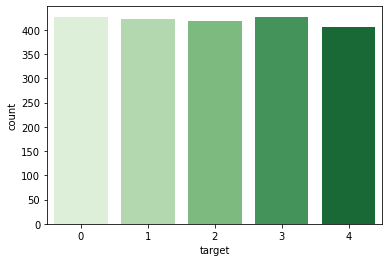

In [16]:
sns.countplot(data=eruption_types, x="target", palette='Greens')

Next we create a box plot for each feature type so we can see the differences between them.

In [37]:
eruption_types_0 = eruption_types[eruption_types["target"] == 0]
eruption_types_1 = eruption_types[eruption_types["target"] == 1]
eruption_types_2 = eruption_types[eruption_types["target"] == 2]
eruption_types_3 = eruption_types[eruption_types["target"] == 3]
eruption_types_4 = eruption_types[eruption_types["target"] == 4]
def create_box_type_0_trace(col, visible=False):
    return go.Box(
        y=eruption_types_0[col],
        name='Plinian',
        marker = dict(color = 'ForestGreen'),
        visible=visible,
    )

def create_box_type_1_trace(col, visible=False):
    return go.Box(
        y=eruption_types_1[col],
        name='Peleana',
        marker = dict(color = 'LimeGreen'),
        visible = visible,
    )

def create_box_type_2_trace(col, visible=False):
    return go.Box(
        y=eruption_types_2[col],
        name='Vulcanian',
        marker = dict(color = 'LightGreen'),
        visible = visible,
    )

def create_box_type_3_trace(col, visible=False):
    return go.Box(
        y=eruption_types_3[col],
        name='Hawaiian',
        marker = dict(color = 'PaleGreen'),
        visible = visible,
    )

def create_box_type_4_trace(col, visible=False):
    return go.Box(
        y=eruption_types_4[col],
        name='Strombolian',
        marker = dict(color = 'SpringGreen'),
        visible = visible,
    )

features_not_for_hist = ["target"]
features_for_hist = [x for x in eruption_types.columns if x not in features_not_for_hist]
# remove features with too less distinct values (e.g. binary features), because boxplot does not make any sense for them
features_for_box = [col for col in features_for_hist if len(eruption_types_0[col].unique())>5 
                    or len(eruption_types_1[col].unique())>5 or len(eruption_types_2[col].unique())>5
                    or len(eruption_types_3[col].unique())>5 or len(eruption_types_4[col].unique())>5]
#features_for_box = [col for col in features_for_hist]
active_idx = 0
box_traces_type_0 = [(create_box_type_0_trace(col) if i != active_idx else create_box_type_0_trace(col, visible=True)) 
                     for i, col in enumerate(features_for_box)]
box_traces_type_1 = [(create_box_type_1_trace(col) if i != active_idx else create_box_type_1_trace(col, visible=True)) 
                     for i, col in enumerate(features_for_box)]
box_traces_type_2 = [(create_box_type_2_trace(col) if i != active_idx else create_box_type_2_trace(col, visible=True)) 
                     for i, col in enumerate(features_for_box)]
box_traces_type_3 = [(create_box_type_3_trace(col) if i != active_idx else create_box_type_3_trace(col, visible=True)) 
                     for i, col in enumerate(features_for_box)]
box_traces_type_4 = [(create_box_type_4_trace(col) if i != active_idx else create_box_type_4_trace(col, visible=True)) 
                     for i, col in enumerate(features_for_box)]


eruption_types_box = box_traces_type_0 + box_traces_type_1 + box_traces_type_2 + box_traces_type_3 + box_traces_type_4

n_features = len(features_for_box)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(eruption_types_box)],
        label = features_for_box[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features + n_features] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features + n_features + n_features] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features + n_features+ n_features + n_features] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ", 
        xanchor= 'center',
        ),
    pad = {"t": 50},
    steps = steps,
    len=1,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='value',
        automargin=True,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)
fig = dict(data=eruption_types_box, layout=layout)
#fig.show()
iplot(fig, filename='box_slider')

Let's check the outliers for each target.

In [34]:
aux=eruption_types[eruption_types["target"] == 0]

Q1 = aux.quantile(0.25)
Q3 = aux.quantile(0.75)
IQR = Q3 - Q1                                

outliers_bool = (aux < (Q1 - 1.5 * IQR)) |(aux > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis=0)

print(f'Total number of outliers:\n{outliers_abs}\n')

Total number of outliers:
feature1    90
feature2     5
feature3    10
feature4     0
feature5     6
feature6    18
target       0
dtype: int64



In [33]:
aux2=eruption_types[eruption_types["target"] == 1]

Q1 = aux2.quantile(0.25)
Q3 = aux2.quantile(0.75)
IQR = Q3 - Q1                                

outliers_bool = (aux2 < (Q1 - 1.5 * IQR)) |(aux2 > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis=0)

print(f'Total number of outliers:\n{outliers_abs}\n')

Total number of outliers:
feature1     2
feature2     2
feature3     8
feature4     1
feature5    14
feature6     2
target       0
dtype: int64



In [32]:
aux3=eruption_types[eruption_types["target"] == 2]

Q1 = aux3.quantile(0.25)
Q3 = aux3.quantile(0.75)
IQR = Q3 - Q1                                

outliers_bool = (aux3 < (Q1 - 1.5 * IQR)) |(aux3 > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis=0)

print(f'Total number of outliers:\n{outliers_abs}\n')

Total number of outliers:
feature1    3
feature2    3
feature3    3
feature4    0
feature5    0
feature6    6
target      0
dtype: int64



In [31]:
aux4=eruption_types[eruption_types["target"] == 3]

Q1 = aux4.quantile(0.25)
Q3 = aux4.quantile(0.75)
IQR = Q3 - Q1                                

outliers_bool = (aux4 < (Q1 - 1.5 * IQR)) |(aux4 > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis=0)

print(f'Total number of outliers:\n{outliers_abs}\n')

Total number of outliers:
feature1    1
feature2    5
feature3    0
feature4    0
feature5    0
feature6    2
target      0
dtype: int64



In [30]:
aux5=eruption_types[eruption_types["target"] == 4]

Q1 = aux5.quantile(0.25)
Q3 = aux5.quantile(0.75)
IQR = Q3 - Q1                                

outliers_bool = (aux5 < (Q1 - 1.5 * IQR)) |(aux5 > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis=0)

print(f'Total number of outliers:\n{outliers_abs}\n')

Total number of outliers:
feature1     3
feature2     4
feature3     0
feature4    10
feature5     1
feature6    13
target       0
dtype: int64



#### Some conclusions on the analyzed data

We can see that the eruption type that has more outliers in general is the Plinian-type. 


-*feature1:* Plinian eruption has quite a lot of outliers in the sensor n1. The other type of eruptions have just a few outliers. Plinian also has the highest values in the vibrations measurements of this feature, while Peleana is the one with lowest values.


-*feature2:* this sensor doesn't have many outliers. The Plinian and Hawaiian eruptions are the ones with more outliers in this feature, but nothing significant. Again Plinian and Peleana are the eruptions with higher and lower values respectively in the vibrations measurements of this sensor.


-*feature3:* again, Plinian eruption is the one with more outliers. Vulcanian eruption has the highest values in the measurements and Peleana, again, the lowest.


-*feature4:* in this feature, Strombolian eruption has significatively more outliers. It has also the lowest values in the measurements, and Peleana the highest along with Plinian.


-*feature5:* Peleana eruption has the most outliers. Strombolian and volcanian eruptions are the one with highest vibrations in this sensor, while Peleana and Plinian have the lowest ones.


-*feature6:* Plinian and Strombolian eruptions have significatively more outliers. Vulcanian has the highest vibrations in this sensor, and Plinian the lowest ones.

I observe that the features in the dataset have a similar scale and look quite similar to each other. I make some visualizations of their distributions to better see the differences between them.

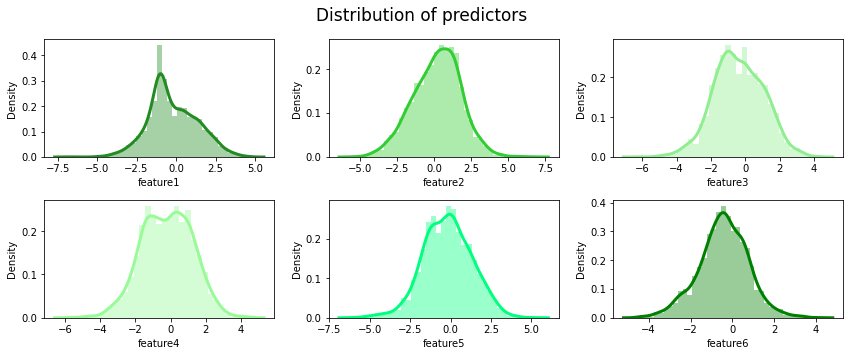

In [43]:
# we will plot the distribution of all the predictors: 
features = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6']
colors =["ForestGreen", "LimeGreen", "LightGreen", 'PaleGreen', 'SpringGreen', 'Green']


f, axes = plt.subplots(2,3, figsize = (12, 5))
f.suptitle('Distribution of predictors', fontsize = 17 )

for i, ax in enumerate(axes.flatten()): 
    sns.distplot(eruption_types[features].iloc[: , i], color = colors[i], ax = ax, kde_kws=dict(linewidth=3))
plt.tight_layout(); 

In the graphs above I can see the distribution for each sensor. Some of them seem close to a normal distribution but I will check if they follow a normal distribution using the Shapiro-Wilk Normality Test. Our Hypothesis is:

H₀: The data is normally distributed.
H₁: The data is not normally distributed.

First, I create a function that checks the distribution for each target:

In [45]:
# create a function that checks if the distribution is normal: 
def check_normal_distribution(eruption_types): 
    
    for i in eruption_types[features]: 
        stat, p_value_norm = shapiro(eruption_types[i])
        print(f'Results for {i}:')
        print('stat=%.3f, p=%.3f' % (stat, p_value_norm))
    
        if p_value_norm < 0.05 : 
            print("Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed")
            print('----------------------------------------------------------------------------------------------')
        else: 
            print("Fail to reject null hypothesis at 95% Significance Level  >> The data is normally distributed")
            print('----------------------------------------------------------------------------------------------')

check_normal_distribution(eruption_types[features])

Results for feature1:
stat=0.989, p=0.000
Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed
----------------------------------------------------------------------------------------------
Results for feature2:
stat=0.996, p=0.000
Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed
----------------------------------------------------------------------------------------------
Results for feature3:
stat=0.998, p=0.005
Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed
----------------------------------------------------------------------------------------------
Results for feature4:
stat=0.997, p=0.000
Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed
----------------------------------------------------------------------------------------------
Results for feature5:
stat=0.998, p=0.004
Reject null hypothesis at 95% Significance Level  

We check the correlation between features.

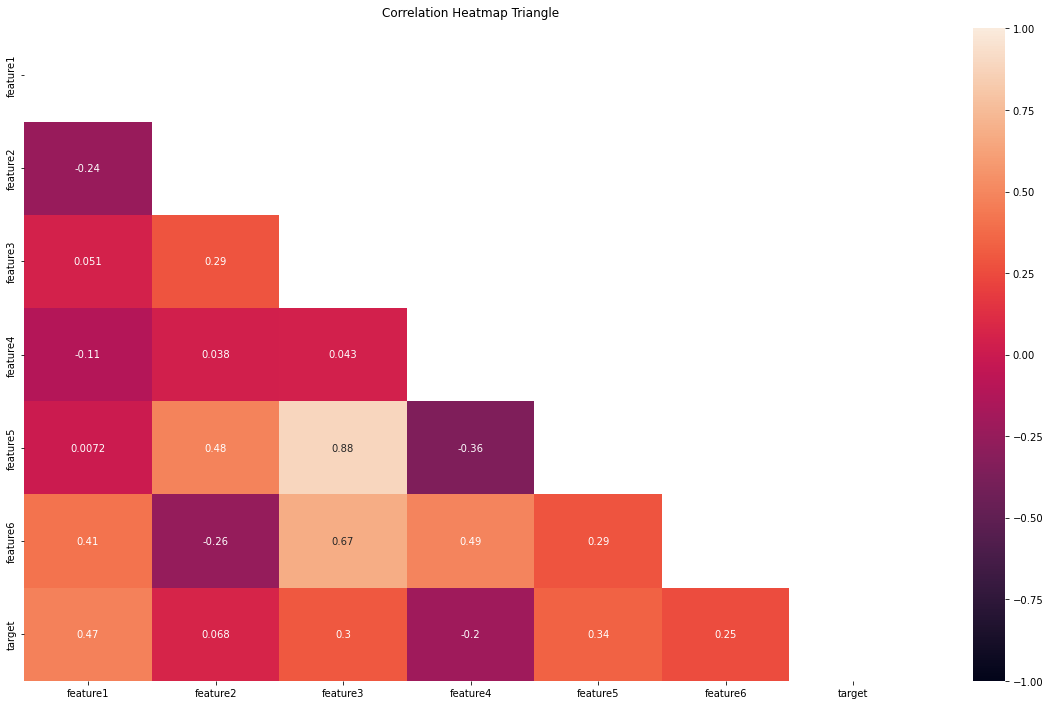

In [28]:
# Increase the size of the heatmap.
plt.figure(figsize=(20, 12))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(eruption_types.corr(), vmin=-1, vmax=1, annot=True, mask= np.triu(eruption_types.corr()))
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap Triangle', fontdict={'fontsize':12}, pad=12);

As we can see in the heatmap above, some features seem to be quite highly correlated with each other, although in general there is not huge correlation between features. The correlations we observe are:

- *feature3* is highly correlated with *feature5* and *feature6*.
- *feature1* is somewhat correlated with *feature6*.
- *feature4* is somewhat correlated with *feature6*.
- *target* is also somewhat correlated with some of the sensors, specially *feature1*.

So, *feature6* is the feature with more correlations.

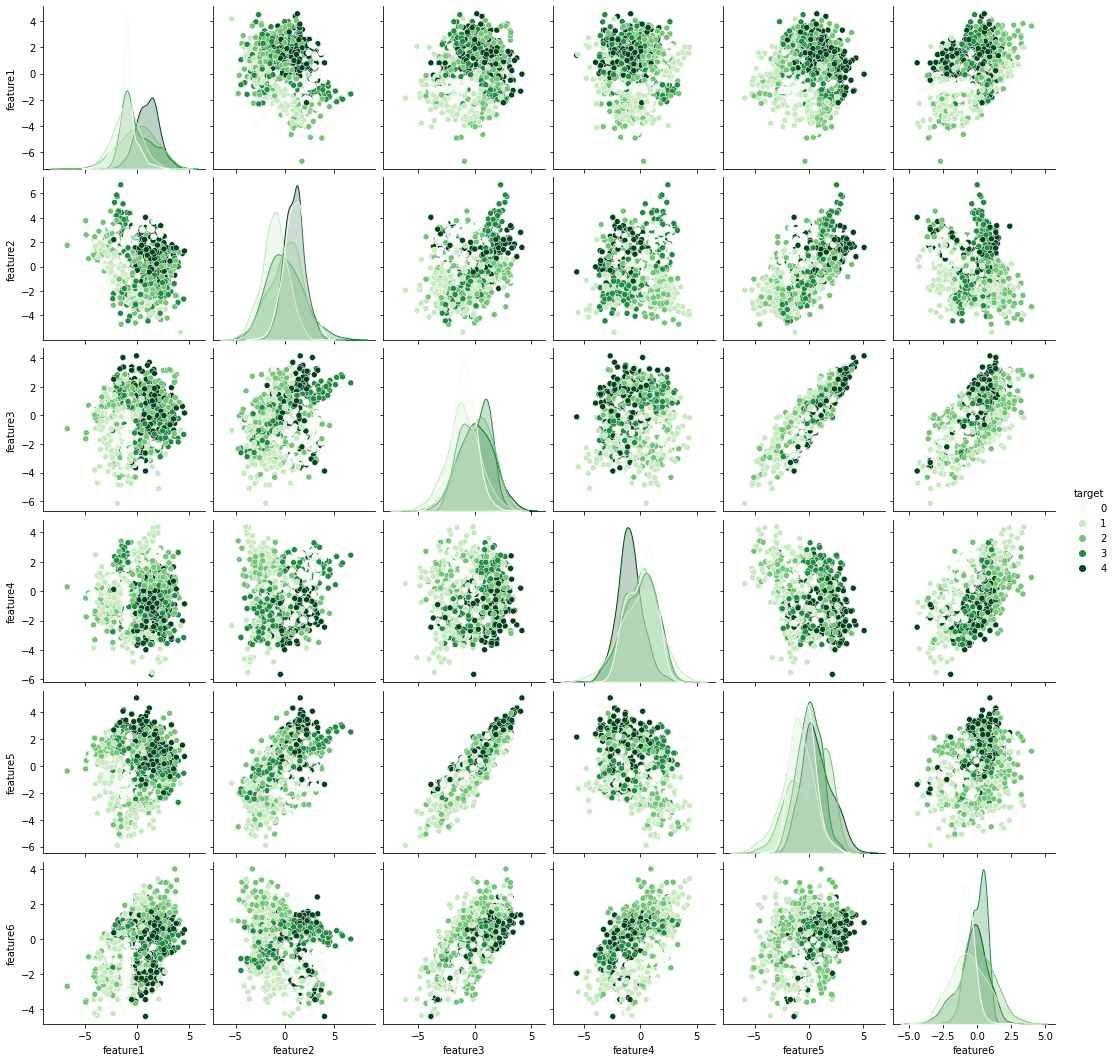

In [48]:
sns.pairplot(eruption_types , hue='target', palette = 'Greens');

<u>Multicolinearity:<u>
    
    
- We observe a quite high correlation between some of the features as we saw in the heatmap. Some variables are highly correlated although we do not observe a clear pattern with respect to the different targets in the scatterplots.

- This high correlation of predictors makes sense in our model, since we are dealing with data collected by different sensors measuring vibrations in different points of the volcano, so it is logical that the results are correlated with each other.

- Although we could perform an analysis to eliminate the high multicollinearity, we could lose predictive power, so the most appropriate approach would be not using all of these features to train our model and to evaluate the Test set to see how the variables are related for these data. 

## Model Building

<u>*Feature selection*<u>

As there are just 6 features and they are all the same in terms of scale, type of information... we will use all of them in our model.

<u>*Scaling the data*<u>

Since we have detected that there are a few outliers, we will perform RobustScaler to our features. This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [51]:
scaled_features = ['feature1', 'feature2', 'feature3', 'feature4','feature5', 'feature6']
scaler = RobustScaler()
eruption_types[scaled_features] = scaler.fit_transform(eruption_types[scaled_features])
eruption_types

,feature1,feature2,feature3,feature4,feature5,feature6,target
0,0.445434,0.255198,-0.793932,-0.505780,-0.406779,-1.031797,4
1,-0.286610,0.646391,-0.601750,-0.648778,-0.068718,-1.396172,0
2,-0.057900,-0.458832,0.059801,-0.784782,0.265622,-0.341886,1
3,-0.399886,1.114319,0.736333,1.414155,0.286327,0.732483,3
4,-0.374758,-0.323708,-1.212086,-0.346412,-0.957634,-1.324341,0
...,...,...,...,...,...,...,...
2095,-0.244078,-0.066189,0.127900,0.138618,0.025360,0.031911,0
2096,-0.378526,-0.132139,0.481263,0.500832,0.152754,0.530686,1
2097,-0.195854,0.553965,0.691095,1.007849,0.278981,0.773139,3
2098,0.929630,0.394389,0.717394,-0.435981,0.863799,0.398047,4


<u>*Model selection*<u>

We will use the most important metrics to compare the different models:

- <u>confusion matrix<u>

The **Confusion Matrix** created has four different quadrants:

True Negative (Top-Left Quadrant)

False Negative (Top-Right Quadrant)

False Positive (Bottom-Left Quadrant)

True Positive (Bottom-Right Quadrant)

True means that the values were accurately predicted, False means that there was an error or wrong prediction.

- <u>correct predictions / total predictions<u>

**accuracy** = (TP+TN)/(TP+FP+FN+TN)

- <u>correct positive predictions / total positive predictions<u>

**precision** = TP/(TP+FP)

- <u>correct positive predictions / total positives<u>

**sensitivity** (or recall) = TP/(TP+FN)

- <u>correct negative predictions / total negatives<u>

**specificity** = TN / (TN + FP)

- <u>f1 score<u>

**f1_score** = 2 x (recall x precision) / (recall + precision)

First of all, we split the data in train and test, choosing a size of 70-30% respectively.

In [52]:
# choose dependent (or target) variable 
y = eruption_types['target']
# choose independent variable 
X = eruption_types[['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

LOGISTIC REGRESSION -> classifier1

The logistic regression is a common and useful regression method for solving binary classification problems.

In [54]:
logreg = LogisticRegression(max_iter = 1000)

# fit the model with data
logreg.fit(X_train,y_train)

# make the predictions
y_pred = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

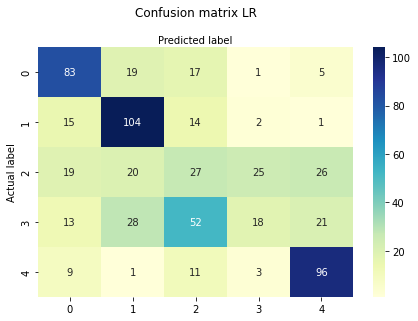

In [55]:
#Get the confusion matrix
cf_matrix_lr = confusion_matrix(y_test, y_pred_test)

class_names=["0", "1", "2", "3", "4"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix_lr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix LR', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
# calculate most important metrics for the classification model

ac_lr = metrics.accuracy_score(y_test, y_pred_test)
pre_lr = metrics.precision_score(y_test, y_pred_test, average='macro')
r_lr = metrics.recall_score(y_test, y_pred_test, average='macro')
f1_lr = metrics.f1_score(y_test, y_pred_test, average='macro')
spe_lr = specificity_score(y_test, y_pred_test, average='macro')

In [57]:
print("Accuracy:",ac_lr)
print("Precision:",pre_lr)
print("Recall:",r_lr)
print("F1:",f1_lr)
print("Specificity:",spe_lr)

Accuracy: 0.5206349206349207
Precision: 0.4873112403211345
Recall: 0.5191677498971616
F1: 0.48873059697590665
Specificity: 0.8804101313941922


XGBOOST -> classifier2

XGBoost (Extreme Gradient Boosting) belongs to a family of boosting algorithms. The basic idea behind boosting algorithms is building a weak model, making conclusions about the various feature importance and parameters, and then using those conclusions to build a new, stronger model and capitalize on the misclassification error of the previous model and try to reduce it.

In [59]:
xboost = xgb.XGBClassifier()

# fit the model with data
xboost.fit(X_train,y_train)

# prediction
y_pred2=xboost.predict(X_train)
y_pred2_test = xboost.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

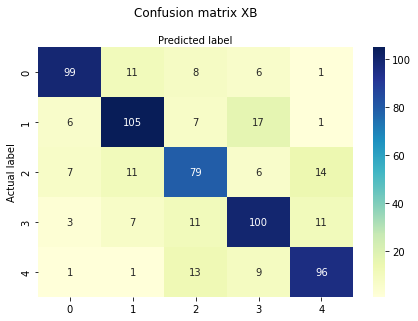

In [73]:
#Get the confusion matrix
cf_matrix_xb = confusion_matrix(y_test, y_pred2_test)

class_names=["0", "1", "2", "3", "4"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix_xb), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix XB', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [61]:
# calculate most important metrics for the classification model

ac_xb = metrics.accuracy_score(y_test, y_pred2_test)
pre_xb = metrics.precision_score(y_test, y_pred2_test, average='macro')
r_xb = metrics.recall_score(y_test, y_pred2_test, average='macro')
f1_xb = metrics.f1_score(y_test, y_pred2_test, average='macro')
spe_xb = specificity_score(y_test, y_pred2_test, average='macro')

In [62]:
print("Accuracy:",ac_xb)
print("Precision:",pre_xb)
print("Recall:",r_xb)
print("F1:",f1_xb)
print("Specificity:",spe_xb)

Accuracy: 0.7603174603174603
Precision: 0.761168613020209
Recall: 0.759369651263769
F1: 0.7599378271251495
Specificity: 0.9400676199114214


RANDOM FOREST -> classifier3

In [63]:
rf = RandomForestClassifier(random_state= 42)

# fit the model with data
rf.fit(X_train,y_train)

# prediction
y_pred3 = rf.predict(X_train)
y_pred3_test = rf.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

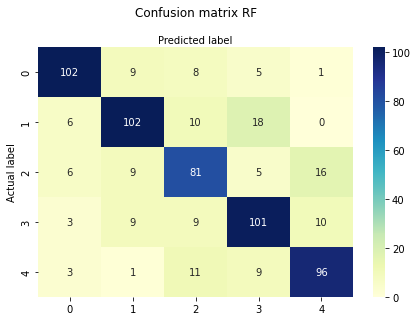

In [126]:
#Get the confusion matrix
cf_matrix_rf = confusion_matrix(y_test, y_pred3_test)

class_names=["0", "1", "2", "3", "4"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix RF', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Interpretation of confusion matrix**

- If we look at class 0 in our test set, there are 125 observations that measure target 0. 102 of these observations have been predicted correctly and 23 of them got ptedictions wrong.
- In wrong predictions for class 0, we have identified 9 wrong observations as class 1, 8 as class 2, 5 as class 3 and 1 of class 4.
- It seems class 2 is the one with worst predicitions (only 81 correct out of 117).

In [65]:
# calculate most important metrics for the classification model

ac_rf = metrics.accuracy_score(y_test, y_pred3_test)
pre_rf = metrics.precision_score(y_test, y_pred3_test, average='macro')
r_rf = metrics.recall_score(y_test, y_pred3_test, average='macro')
f1_rf = metrics.f1_score(y_test, y_pred3_test, average='macro')
spe_rf = specificity_score(y_test, y_pred3_test, average='macro')

In [66]:
print("Accuracy:",ac_rf)
print("Precision:",pre_rf)
print("Recall:",r_rf)
print("F1:",f1_rf)
print("Specificity:",spe_rf)

Accuracy: 0.765079365079365
Precision: 0.7655319032744021
Recall: 0.7646918414918416
F1: 0.7648565274723891
Specificity: 0.9412727668801125


DECISION TREE -> classifier4

In [67]:
dt = DecisionTreeClassifier()

# fit the model with data
dt.fit(X_train, y_train);

# prediction
y_pred4 = dt.predict(X_train)
y_pred4_test = dt.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

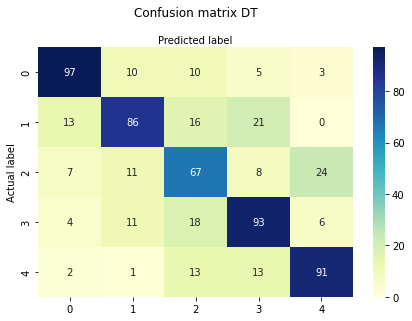

In [71]:
#Get the confusion matrix
cf_matrix_dt = confusion_matrix(y_test, y_pred4_test)

class_names=["0", "1", "2", "3", "4"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix_dt), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix DT', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [74]:
# calculate most important metrics for the classification model

ac_dt = metrics.accuracy_score(y_test, y_pred4_test)
pre_dt = metrics.precision_score(y_test, y_pred4_test, average='macro')
r_dt = metrics.recall_score(y_test, y_pred4_test, average='macro')
f1_dt = metrics.f1_score(y_test, y_pred4_test, average='macro')
spe_dt = specificity_score(y_test, y_pred4_test, average='macro')

In [75]:
print("Accuracy:",ac_dt)
print("Precision:",pre_dt)
print("Recall:",r_dt)
print("F1:",f1_dt)
print("Specificity:",spe_dt)

Accuracy: 0.6888888888888889
Precision: 0.689957244896385
Recall: 0.6887762603409662
F1: 0.6885019269408196
Specificity: 0.9223037457095474


SUPPORT VECTOR MACHINE -> classifier5

In [76]:
#Create a svm Classifier
svm = svm.SVC(kernel='linear', probability=True) # Linear Kernel

# first set of variables

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
y_pred5 = svm.predict(X_train)
y_pred5_test = svm.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

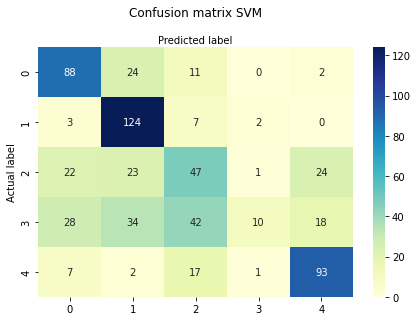

In [77]:
#Get the confusion matrix
cf_matrix_svm = confusion_matrix(y_test, y_pred5_test)

class_names=["0", "1", "2", "3", "4"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix_svm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [78]:
# calculate most important metrics for the classification model

ac_svm = metrics.accuracy_score(y_test, y_pred5_test)
pre_svm = metrics.precision_score(y_test, y_pred5_test, average='macro')
r_svm = metrics.recall_score(y_test, y_pred5_test, average='macro')
f1_svm = metrics.f1_score(y_test, y_pred5_test, average='macro')
spe_svm = specificity_score(y_test, y_pred5_test, average='macro')

In [111]:
print("Accuracy:",ac_svm)
print("Precision:",pre_svm)
print("Recall:",r_svm)
print("F1:",f1_svm)
print("Specificity:",spe_svm)

Accuracy: 0.5746031746031746
Precision: 0.5931557000316534
Recall: 0.5736463366698661
F1: 0.5236967836731197
Specificity: 0.8937535640549961


In [112]:
# create a table with all the results

all_models_metrics = {'Model':['Logistic Regression', 'Xboost', 'Random Forest', 'Decision Tree', 'Support Vector Machine'], 
      'Type':['LR', 'XB', 'RF','DT','SVM'], 
      'Accuracy':[ac_lr, ac_xb, ac_rf, ac_dt, ac_svm], 
      'Precision':[pre_lr, pre_xb, pre_rf, pre_dt, pre_svm], 
      'Recall':[r_lr, r_xb, r_rf, r_dt, r_svm], 
      'F1_score':[f1_lr, f1_xb, f1_rf, f1_dt, f1_svm],
      'Specificity':[spe_lr, spe_xb, spe_rf, spe_dt, spe_svm]}
clf_metrics=pd.DataFrame(all_models_metrics)
clf_metrics

,Model,Type,Accuracy,Precision,Recall,F1_score,Specificity
0,Logistic Regression,LR,0.520635,0.487311,0.519168,0.488731,0.880410
1,Xboost,XB,0.760317,0.761169,0.759370,0.759938,0.940068
2,Random Forest,RF,0.765079,0.765532,0.764692,0.764857,0.941273
3,Decision Tree,DT,0.688889,0.689957,0.688776,0.688502,0.922304
4,Support Vector Machine,SVM,0.574603,0.593156,0.573646,0.523697,0.893754


Classification report gives us individal metrics for each class of the target in the chosen model, Random Forest:

In [125]:
print(classification_report(y_test, y_pred3_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       125
           1       0.78      0.75      0.77       136
           2       0.68      0.69      0.69       117
           3       0.73      0.77      0.75       132
           4       0.78      0.80      0.79       120

    accuracy                           0.77       630
   macro avg       0.77      0.76      0.76       630
weighted avg       0.77      0.77      0.77       630



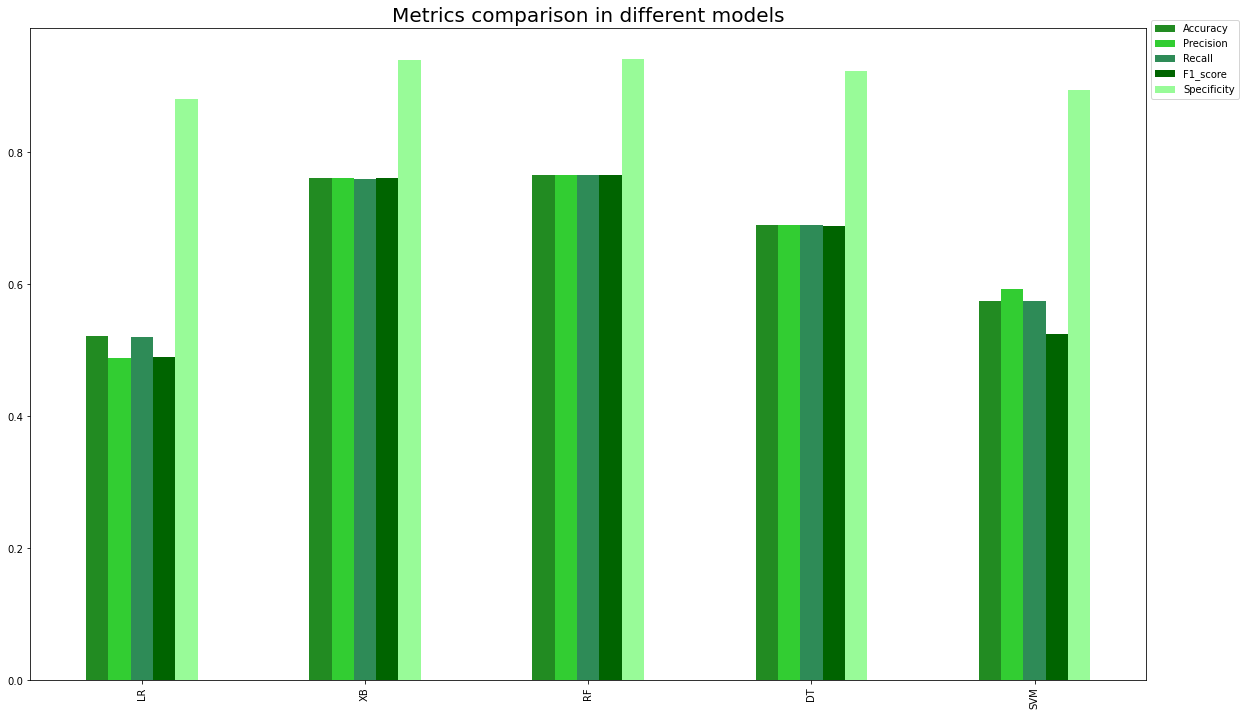

In [113]:
clf_metrics2 = clf_metrics.set_index('Type')
ax = clf_metrics2[['Accuracy', 'Precision', 'Recall', 'F1_score', 'Specificity']].plot(kind='bar', figsize=(20, 12), color = ['Forestgreen', 'Limegreen', 'Seagreen', 'Darkgreen', 'Palegreen'])
ax.set_title('Metrics comparison in different models', fontsize = 20)
ax.set_xlabel('')
ax.set_ylabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='best', bbox_to_anchor=(1, 1.02)); 

We can see that the best performing model is **RandomForest**, so we will use that model to perform cross validation and hyperparameter tunning.

<u>***Hyperparameter tunning***<u>

Let's try to improve our model using GridSearch. First let´s look at the default parameters of our model:

<u> Random Forest <u>

In [82]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [83]:
#dictionary of search space
space = dict()
space['n_estimators'] = [700, 800, 20] # Number of trees in random forest
space['max_depth'] = [6, 7, 10, 20]
space['max_features'] = [0.4, 0.5, 0.6] # Number of features to consider at every split
space['criterion'] = ['gini', 'entropy']

search = GridSearchCV(rf, space)

result = search.fit(X_train, y_train)

print('Best Hyperparameters: ', result.best_params_)

Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 0.5, 'n_estimators': 800}


In [84]:
rf_adj = RandomForestClassifier(criterion = 'entropy', n_estimators = 800, max_depth = 20, max_features = 0.5 )

In [85]:
rf_adj.fit(X_train, y_train)
y_pred_adj = rf_adj.predict(X_train)
y_pred_test_adj = rf_adj.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

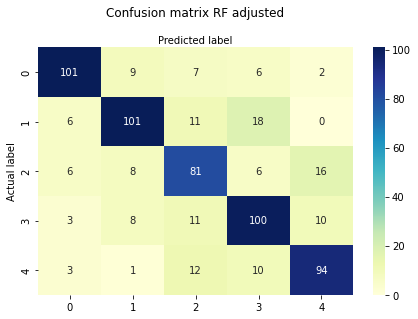

In [86]:
#Get the confusion matrix
cf_matrix_rf_adj = confusion_matrix(y_test, y_pred_test_adj)

class_names=["0", "1", "2", "3", "4"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix_rf_adj), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix RF adjusted', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [87]:
ac_rf_adj = metrics.accuracy_score(y_test, y_pred_test_adj)
pre_rf_adj = metrics.precision_score(y_test, y_pred_test_adj, average='macro')
r_rf_adj = metrics.recall_score(y_test, y_pred_test_adj, average='macro')
f1_rf_adj = metrics.f1_score(y_test, y_pred_test_adj, average='macro')
spe_rf_adj = specificity_score(y_test, y_pred_test_adj, average='macro')

In [88]:
print("Accuracy:", ac_rf_adj)
print("Precision:", pre_rf_adj)
print("Recall:", r_rf_adj)
print("F1:", f1_rf_adj)
print("Specificity:",spe_rf_adj)

Accuracy: 0.7571428571428571
Precision: 0.7585454060286823
Recall: 0.7567727684080625
F1: 0.757181515704527
Specificity: 0.9393159166961743


In [114]:
# add the results to the table

new_row = {'Model':'Random Forest Adj', 'Type': 'RFAd', 'Accuracy':ac_rf_adj, 'Precision':pre_rf_adj, 
           'Recall': r_rf_adj, 'F1_score': f1_rf_adj, 'Specificity': spe_rf_adj}

clf_metrics = clf_metrics.append(new_row, ignore_index=True)

clf_metrics

,Model,Type,Accuracy,Precision,Recall,F1_score,Specificity
0,Logistic Regression,LR,0.520635,0.487311,0.519168,0.488731,0.880410
1,Xboost,XB,0.760317,0.761169,0.759370,0.759938,0.940068
2,Random Forest,RF,0.765079,0.765532,0.764692,0.764857,0.941273
3,Decision Tree,DT,0.688889,0.689957,0.688776,0.688502,0.922304
4,Support Vector Machine,SVM,0.574603,0.593156,0.573646,0.523697,0.893754
5,Random Forest Adj,RFAd,0.757143,0.758545,0.756773,0.757182,0.939316


Not only GridSearch didn't improve our F1 score but it worsened it. Let's try cross validation.

<u>***Cross validation***<u>

Since the hyperparameter tunning didn't improve our results, I will perfom Cross validation to the first Random Forest model not adjusted.

In [100]:
# apply cross validation for f1_score

ac_cv_rf = cross_val_score(rf, X, y, scoring = "accuracy", cv = 20)
pre_cv_rf = cross_val_score(rf, X, y, scoring = "precision_macro", cv = 20)
r_cv_rf = cross_val_score(rf, X, y, scoring = "recall_macro", cv = 2)
f1_cv_rf = cross_val_score(rf, X, y, scoring = "f1_macro", cv = 20)

In [115]:
ac_cv_rf = (abs(np.mean(ac_cv_rf)).round(4))
ac_cv_rf

0.7767

In [116]:
pre_cv_rf = (abs(np.mean(pre_cv_rf)).round(4))
pre_cv_rf

0.7814

In [117]:
r_cv_rf = (abs(np.mean(r_cv_rf)).round(4))
r_cv_rf

0.7439

In [118]:
f1_cv_rf = (abs(np.mean(f1_cv_rf)).round(4))
f1_cv_rf

0.7759

We can get the confusion matrix for the cross validation approach.

In [169]:
y_pred3_cv = cross_val_predict(rf, X, y, cv=20)

In [170]:
conf_mat = confusion_matrix(y, y_pred3_cv)
conf_mat

array([[349,  34,  27,  14,   3],
       [ 28, 313,  34,  44,   4],
       [ 22,  37, 303,  18,  39],
       [  9,  39,  17, 328,  33],
       [ 10,   2,  26,  29, 338]], dtype=int64)

In [119]:
new_row1 = {'Model': 'Random Forest CV', 'Type': 'RFCV', 'Accuracy':ac_cv_rf , 'Precision':pre_cv_rf ,'Recall': r_cv_rf,'F1_score':f1_cv_rf, 'Specificity': '-'}
clf_metrics = clf_metrics.append(new_row1, ignore_index=True)
clf_metrics

,Model,Type,Accuracy,Precision,Recall,F1_score,Specificity
0,Logistic Regression,LR,0.520635,0.487311,0.519168,0.488731,0.88041
1,Xboost,XB,0.760317,0.761169,0.759370,0.759938,0.940068
2,Random Forest,RF,0.765079,0.765532,0.764692,0.764857,0.941273
3,Decision Tree,DT,0.688889,0.689957,0.688776,0.688502,0.922304
4,Support Vector Machine,SVM,0.574603,0.593156,0.573646,0.523697,0.893754
5,Random Forest Adj,RFAd,0.757143,0.758545,0.756773,0.757182,0.939316
6,Random Forest CV,RFCV,0.776700,0.781400,0.743900,0.775900,-


If we compare the metrics results with the train/test approach, we can see that with the cross validation approach they're better. We improved the model from a F1score of 0'7648 to 0'7759.

<u>***ROC/AUC curve***<u>

Although the ROC/AUc curve is used for binary classification models, it can also be represented using the one-versus-all technique. This means that, for example, the ROC for class 0 is generated by representing the classifier as 0 versus not 0, and so on for all classes.

In [138]:
y_proba = rf.predict_proba(X_test)

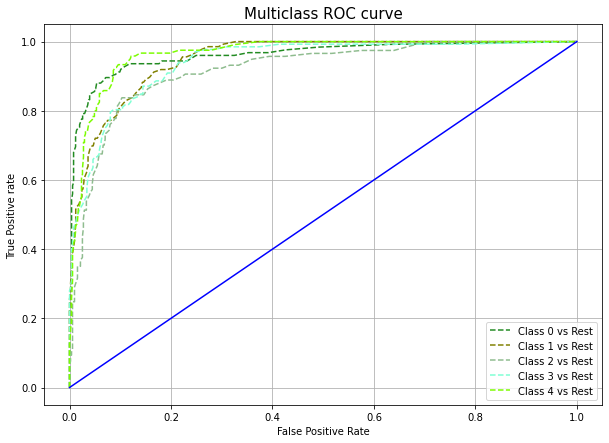

In [146]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

# defining number of classes 
n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_proba[:,i], pos_label=i)
    
# plotting    
plt.figure(figsize = (10,7))
plt.plot(fpr[0], tpr[0], linestyle='--',color='ForestGreen', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='Olive', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='DarkseaGreen', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='Aquamarine', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='LawnGreen', label='Class 4 vs Rest')
plt.plot([0, 1], [0, 1], color = 'blue')
plt.title('Multiclass ROC curve', fontsize = 15)
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()    


Although it is clear from the plot that Class 2 is the one with the worst predictions, we can see that our model is quite balanced between all classes.

## Prepare the model for final predictions

In [147]:
transformer = RobustScaler()

# prepare the scaler 
preprocessor = ColumnTransformer(transformers = [('scaling', transformer, X.columns)])

# prepare the model 
final_model = RandomForestClassifier(n_estimators= 100, max_depth=40, max_features= 0.5, criterion = 'gini',random_state=42)

# prepare Pipeline 
pipeline = Pipeline( steps= [('preprocessor', preprocessor), ('model', final_model)])

# fit on all data 
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaling', RobustScaler(),
                                                  Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=40, max_features=0.5,
                                        random_state=42))])

In [151]:
# open test data 
test_eruption_types = pd.read_csv('jm_X_test.csv')
test_eruption_types.head()

,feature1,feature2,feature3,feature4,feature5,feature6
0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338
1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068
2,0.293281,-0.099317,1.874902,-0.589582,1.828441,1.011596
3,-1.134804,0.888585,-1.464499,-1.183056,-0.525729,-1.963822
4,-0.909240,1.575797,0.697212,1.197092,0.486185,0.222644


In [152]:
final_predictions = pipeline.predict(test_eruption_types)
final_predictions

array([1, 3, 2, 1, 3, 2, 4, 1, 2, 1, 1, 4, 3, 1, 4, 4, 4, 4, 4, 0, 1, 2,
       1, 0, 0, 2, 2, 1, 2, 4, 1, 4, 4, 1, 3, 1, 0, 4, 1, 0, 0, 1, 3, 2,
       1, 1, 0, 1, 0, 4, 4, 0, 4, 1, 4, 4, 1, 1, 3, 2, 1, 0, 3, 1, 4, 1,
       1, 0, 2, 1, 2, 1, 0, 1, 4, 2, 2, 3, 2, 3, 4, 1, 1, 2, 1, 1, 1, 3,
       1, 2, 2, 4, 1, 1, 0, 3, 4, 1, 2, 4, 0, 0, 1, 4, 1, 3, 4, 2, 3, 1,
       0, 1, 2, 3, 1, 0, 1, 3, 2, 0, 0, 4, 4, 3, 3, 4, 4, 1, 3, 2, 2, 1,
       4, 1, 2, 2, 3, 0, 2, 4, 0, 4, 1, 1, 2, 3, 3, 3, 3, 4, 1, 2, 2, 4,
       1, 4, 2, 4, 4, 2, 2, 2, 3, 1, 1, 4, 0, 3, 2, 0, 0, 2, 0, 4, 1, 2,
       3, 0, 3, 2, 1, 3, 0, 4, 1, 1, 0, 3, 4, 1, 1, 1, 2, 4, 1, 2, 0, 4,
       1, 2, 2, 2, 4, 3, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 4, 4, 2, 1, 1,
       2, 4, 1, 2, 3, 2, 1, 1, 2, 0, 0, 4, 4, 1, 4, 4, 0, 3, 3, 3, 1, 0,
       3, 2, 2, 2, 2, 2, 2, 0, 4, 3, 0, 3, 1, 1, 1, 3, 1, 4, 1, 1, 2, 2,
       2, 4, 2, 4, 1, 2, 2, 4, 2, 2, 2, 2, 1, 4, 2, 4, 2, 1, 2, 1, 1, 4,
       1, 1, 2, 2, 2, 2, 0, 2, 2, 1, 4, 4, 1, 2, 0,

In [172]:
# save results 
final_predictions_eruptions = pd.DataFrame({'final_status': final_predictions})
final_predictions_eruptions.head()

,final_status
0,1
1,3
2,2
3,1
4,3


In [173]:
# save to csv file 
final_predictions_eruptions.to_csv('eruption_predictions.csv', index = False )

## Conclusions

- It is a small dataset with little features and all the features have the same characteristics so it's difficult to "play" with them to achieve different results.

- I have chosen RandomForest for the predictions because of its good results compared to the other models evaluated.

- I have found that RandomForest has been a very stable model and when performing CrossValidation it has given very consistent results, so we believe that it is a robust model.

- On the other hand, it has been difficult to improve the initial results of the model, I tried several different techniques and I achieved small improvements. It seems that the default parameters already worked well with our data.